# Aula 2
## Cálculo de campo elétrico

Dado um conjunto de cargas no espaço, o script abaixo calcula o campo elétrico resultante.
Baseado em: https://scipython.com/blog/visualizing-a-vector-field-with-matplotlib/

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [20]:
E0 = 8.8e-12 # Permissividade dieletrica no vacuo [C^2/(N*m^2)]
K = 1/(4*np.pi*E0) # Calcular K por conveniencia [(N*m^2)/C^2]
e = 1.60217662e-19 # Carga do eletron [C]
vermelho = '#ff0000'
azul = '#0000ff'

## Função para cálculo do campo elétrico em duas dimensões
A função recebe um valor de carga q, sua posição r0 e um ponto arbitrário (x,y) para o qual o valor de campo é calculado

In [21]:
def E(q, r0, x, y):
    # Calcula campo eletrico gerado por uma carga q na posicao r0 sobre o ponto (x,y).
    den = np.hypot(x-r0[0], y-r0[1])**3 # |r|^3
    # Calculo separado por componentes
    Ex = K * q * (x - r0[0]) / den # q*r21/|r21|^3
    Ey = K * q * (y - r0[1]) / den
    return Ex, Ey 

Gera uma grade de pontos para os quais o campo será calculado

In [22]:
nx, ny = 64, 64 # número de pontos em cada eixo
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y = np.meshgrid(x, y)
EtotalX = np.zeros((ny, nx)) #Campo resultante em X
EtotalY = np.zeros((ny, nx)) #Campo resultante em Y

## Criação da lista de cargas para as quais o campo resultante será calculado
As cargas são definidas no formato (Carga, (posicao_x, posicao_y)) separados por vírgula

In [23]:
cargas = [(e,(-1, 0))]

A contribuição de cada carga é contabilizada para o campo total

In [24]:
for charge in cargas:
    ex, ey = E(*charge, x=X, y=Y)
    EtotalX += ex
    EtotalY += ey

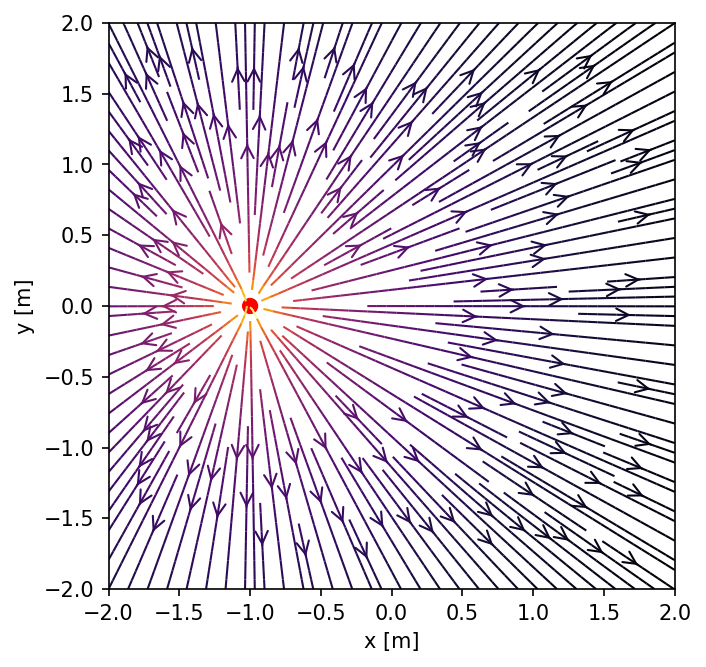

In [25]:
# Mostra os resultados
fig = plt.figure(figsize=(5,5), dpi= 150)
ax = fig.add_subplot(111)

# Colore de acordo com magnitude do vetor e mapeia para escala logaritmica
color = 2 * np.log(np.hypot(EtotalX, EtotalY)) 

ax.streamplot(x, y, EtotalX, EtotalY, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Adiciona circulos coloridos que representam as cargas
for q, pos in cargas:
    if q >0:
        cor = vermelho
    else:
        cor = azul
    ax.add_artist(Circle(pos, radius=0.05, color=cor))

# Identifica eixos
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')
plt.show()

## Exercicio 1: 
Modifique a lista de cargas para criar um dipolo com orientação em j.

## Exercicio 2: 
Modifique os valores das cargas e observe o efeito no campo resultante.

## Exercício 3:
Explique o motivo pelo qual o gráfico desenhado não está fiel à física de campos elétricos.